A large portion of the field of statistics is concerned with methods that assume a Gaussian distribution: the familiar bell curve.

If your data has a Gaussian distribution, the parametric are powerful and well understood. This gives some incentive to use them if possible. Even if your data not have a Gaussian distribution.

If is possible that your data does not look Gaissian or fails a normality test, but can be transformed to make it fit a Gaussian distribution. This is more likely you are familiar with the process that generated the observations and you believe it to be a Gaussian process, or the distribution looks almost Gaussian, except for some distortion.

In this tutorial, you will discover the reasons why a Gaussian-like distribution may be distorted and techniques that you can use to make a data sample more normal.

After completing this totorial, you will know:

- How to consider the size of the sample and whether that law of large numbers may help improve the distribution of a sample.
- How to identify and remove extreme values and lnglails from a distribution.
- Power transforms and the Box-Cox transform that can used to control for quadratic or exponential distributions.

# Tutorial Overview

This tutorial is divided into 7 parts; they are:

1. Gaussian and Gaussian-Like
1. Sample Size
1. Data Resolition
1. Extreme Values
1. Long Tails
1. Power Transforms
1. Use Anyway

# Gaussian and Gaussian-Like

There may be occasions when you are working with a non-Gaussian distribution, but wish to use parametric statistical methods instead of nonparametric methods.

For example, you may have a data sample that has the familiar bell-shape, meaning that it looks Gaussian, but it fails one or more statistical normality tests. You would preder to use parametric statistics in this situation given that better statistical power an because the data is clearly Gaussian, or could be, after the right data transform.

There are many reasons why the dataset may not be technically Gaussian. In this post, we will look at some simple techniques that you may be able to use to transform a data sample with a Gaussian-like distribution into a Gaussian distribution.

There is so silver bullet for this oricess; some experimentation and jidgment may be required.

# Sample Size 

One common reason that a data sample is non-Gaussian is because the size of the data sample is too small.

Many statisticak methods were developed where data was scarce. Hence, the minimum. Number of samples for many methods may be as low as 20 or 30 observations.

Nevertheless, given the noise in your data, you may not see the familiar bell-shape or fail normality tests with a modest number of samples, such as 50 or 100. If this is the case, perhaps you can collect more data. Thanks to the law of large numbers, the more data that you collect, the more lokely your data will be able to used to describe the nuderlying population distribution.

To make this concrete, below is an exmaple of a plot of a small sample of 50 observations drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 50.

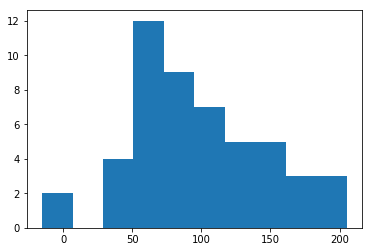

In [10]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(50) + 100
# histogram
pyplot.hist(data)
pyplot.show()

Running the sample creates a histogram plot of the data showing no clear Gaussian distribution, not even Gaussian-like.

Increasing the size of the sample from 50 to 100 can help to better expose the Gaussian shape of the data distribution. 

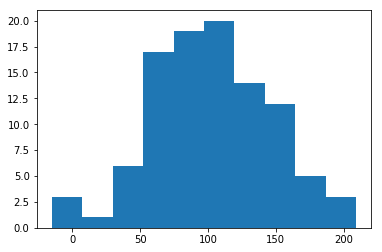

In [11]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(100) + 100
# histogram
pyplot.hist(data)
pyplot.show()

Running the example, we can better see Gaussian distribution oif the data that would pass both statistical tests and eye-ball checks.

# Data Resolution 

Perhaps you expect a Gaussian distribution from the data, but no matter the size of the sample that you collect, it does not materialize.

A common reason for this is the resolution that you are using to collect the observations. The distribution of the data may be obsecured by the chosen resolution of the data or the fidelity of the observations. There may be many reasons why the resolution of the data is being modified prior to modeling, such as:

- The configuration of the mechanism making the observation. 
- The data is passing through a quality-control process. 
- The resolution of the database used to store the data.

To make this concrete, we can make a sample of 100 random Gaussian numbers with a mean of 0 and a standard deviation of 1 and remove all of the decimal places.

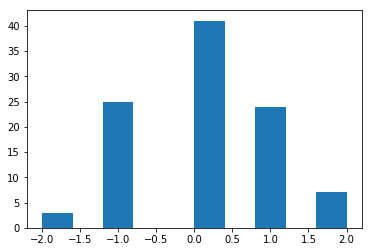

In [12]:
# histogram plot of a low res sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = randn(100)
# remove decimal component
data = data.round(0)
# histogram
pyplot.hist(data)
pyplot.show()

Running the example results in a distribution that appears discrete although Gaussian-like. Adding the resolution back to the observations would result in a fuller distribution of the data.

# Extreme Values 

A data sample may have a Gaussian distribution, but may be distorted for number of reasons. 

A common reason is the presence of extreme values at the edge of the distribution. Extreme values could be present for a number of reasons, such as:

- Measurement error. 
- Missing data. 
- Data corruption. 
- Rare events.

In such cases, the extreme values could be identified and removed in order to make the distribution more Gaussian. There extreme values are often called outliers.

This may require domain expertise or consultation with a domain expert in order to both design the criteria for identifying outliers and then removing them from the data sample and all data samples that you or your model expect to work with in the future.

We can demonstrate how easy it is to have extreme values disrupt the distribution of data.

The example below creates a data sample with 100 random Gaussian numbers scaled to have a mean of 10 and a standard deviation of 5. An additional 10 zero-valued observations are then added to the distribution. This can happen if missing or corrupt values are assigned the value of zero. This is a common behavior publicly available machine learning datasets; for example.

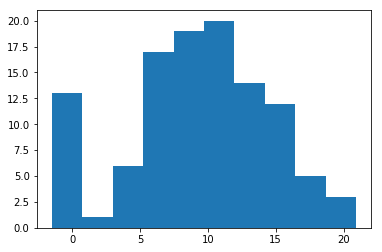

In [13]:
# histogram plot of data with outliers
from numpy.random import seed
from numpy.random import randn
from numpy import zeros
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
# add extreme values
data = append(data, zeros(10))
# histogram
pyplot.hist(data)
pyplot.show()

# Long Tails 

Extreme values can manifest in many ways. In addition to an abundance of rare events at the edge of the distribution, you may see a long tail on the distribution in one or both directions.

In plots, this can make the distribution look like it is exponential, when in fact it might be Gaussian with an abundance of rare events in one direction.

You could use simple threshold values, perhaps based on the number of standard deviations form the mean, to identify and remove long tail values.

We can demonstrate this with a contrived example. The data sample contains 100 Gaussian random numbers with a mean of 10 and a standard deviation of 5. An additional 50 uniformly random valuess in the range 10-to-100 are added. This creates a long tail on the distribution.

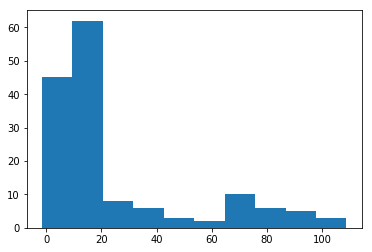

In [14]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)
# add long tail
data = append(data, tail)
# histogram
pyplot.hist(data)
pyplot.show()

Running the example you can see how the long tail distorts the Gaussian distribution and males it look almost exponential or perhaps even bimodal (two bumps).

We can use a simple threshold, such as a value of 25, on this dataset as a cutoff and remoce all observations higher than this threshold. We did choose thos threshold with prior knowledge of how the data sample was contrived, but you can imagine testing different thresholds on your own dataset and evaluation their effect.

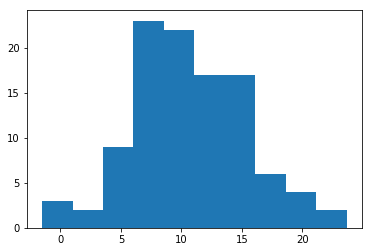

In [15]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
tail = 10 + (rand(10) * 100)
# add long tail
data = append(data, tail)
# trim values
data = [x for x in data if x < 25]
# histogram
pyplot.hist(data)
pyplot.show()

Running the code shows how this simple trimming of the long tail returns the data to a Gaussian distribution.

# Power Transforms 

The distribution of the data may be normal, but the data may require a transform in order to help expose it.

For example, the data may have a skew, meaning that the bell in the bell shape may be pushed one way or another. In some cases, this can be corrected by transforming the data via calculating the square root of the observations. Altermately, the distribution may be exponentail, but may look normal if the observations are transformed by taking the natural logarithm of the values. Data with this distribution is called log-normal.

To make this concrete, below is an example of a sample of Gaussian numbers transformed to have an exponential distribution. 

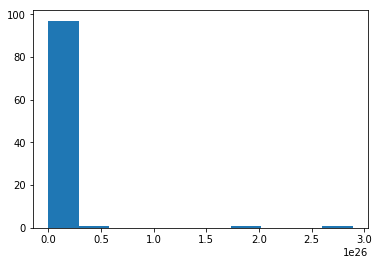

In [16]:
# log-normal distribution
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data = 5 * randn(100) + 50
# transform to be exponential
data = exp(data)
# histogram
pyplot.hist(data)
pyplot.show()

Running the example creates a histogram showing the exponential distribution. It is not obvious that the data is in fact log-normal.

Taking the square root and the logarithm of the observation in order to male the distribution normal belongs to a class of transforms called power. The Box-Cox method is a data transform method that is able to perform a range of power transforms, including the log and the square root. The method is named for George Box and David Cox. 

More that that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your data sample. The resulting data sample may be more linear and will better represent the underlying non-power distribution, including Gaussian.

The boxcox() SciPy function implements the Box-Cox method. It takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda:

- **lambda = -1.** is a reciprocal transform.
- **lambda = -0.5** is a reciprocal square root transform.
- **lambda = 0.0** is a log transform.
- **lambda = 0.5** is a square root transform.
- **lambda = 1.0** is no transform.

For example, because we know that the data is lognormal, we can use the Box-Cox to perform the log transform by setting lambda explicitly to 0.

The complete example of applying the Box-Cox transform on the exponential data sample is listed below.

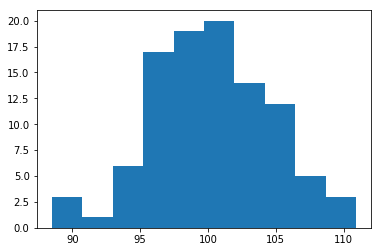

In [17]:
# box-cox transform
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data = 5 * randn(100) + 100
# transform to be exponential
data = exp(data)
# power transform
data = boxcox(data, 0)
# histogram
pyplot.hist(data)
pyplot.show()

Running the example performs the Box-Cox transform on the data sample and plots the result, clearly showing the Gaussian distribution.

A limitation of the Box-Cox transform is that it assumes that all values in the data sample are positive.

An alternative method that does not make this assumption is the Yeo-Johnson transformation.

# Use Anyway

Finally, you may wish to treat the data as Gaussian anyway, especially if the data is already Gaussian-like.

In some cases, such as the use of parametric statistical methods, this may lead to optimistic findings. 

In other cases, such as machine learning methods that make Gaussian expectations on input data, you may still see good results.

This is a choice you can make, as long as you are aware of the possible downsides.

# Extensions 

This section lists some ideas for extending the tutorial that you may wish to explore.

- List 3 possible additional ways that a Gaussian distribution may have been distorted.
- Develop a data sample and experiment with the 5 common values for lambda in the Bix-Cox transform.
- Load a machine learning dataset where at least one variable has a Gaussian-like distribution and experiment.